<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/heck_boronic_acids/heck_boronic_acids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [56]:
# ✅ Step 0: Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors") or k in ["aggregate", "regression", "extractor", "sterimol", "utils"]:
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [57]:
# ✅ Install required packages
!pip install morfeus-ml

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

# ✅ Set module path
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")


import sterimol
importlib.reload(sterimol)

# ✅ Reload modules
import aggregate, regression, extractor
importlib.reload(aggregate)
importlib.reload(regression)
importlib.reload(extractor)

# ✅ Import usage functions
from aggregate import generate_feature_table
from regression import prepare_data, search_best_models

Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 343 (delta 11), reused 9 (delta 5), pack-reused 321 (from 1)
Receiving objects: 100% (343/343), 34.89 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (219/219), done.
Updating files: 100% (93/93), done.


In [58]:
import aggregate
print("Using aggregate.py from:", aggregate.__file__)

import extractor
print("Using extractor.py from:", extractor.__file__)

Using aggregate.py from: /content/DFTDescriptorPipeline/descriptors/aggregate.py
Using extractor.py from: /content/DFTDescriptorPipeline/descriptors/extractor.py


In [59]:
import os
import glob

# Specify the folder you want to scan
folder = "/content/DFTDescriptorPipeline/examples/heck_boronic_acids"

# Automatically grab the only .xlsx file in the folder
xlsx_path = glob.glob(os.path.join(folder, "*.xlsx"))[0]
log_folder = os.path.join(folder, "logfiles")

print("✔ xlsx_path =", xlsx_path)
print("✔ log_folder =", log_folder)

✔ xlsx_path = /content/DFTDescriptorPipeline/examples/heck_boronic_acids/Heck_boronic_acid.xlsx
✔ log_folder = /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles


In [60]:
# ✅ 1. Generate a complete feature table from log + excel
df = generate_feature_table(log_folder, xlsx_path)

# ✅ 2. Define target and feature fields
target = "ddG"
features = [
    'Ar_NBO_C2', 'Ar_NBO_=O', 'Ar_NBO_-O',
    'Ar_v_C=O', 'Ar_I_C=O', 'Ar_dp',
    'Ar_polar', 'Ar_LUMO', 'Ar_HOMO',
    'Ar_Ster_L', 'Ar_Ster_B1', 'Ar_Ster_B5',
    'L_C1_C2'
]

Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 18, D: 8, F: 1, G: 1
Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 16, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 17, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 20, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 16, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 18, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 16, D: 8, F: 1, G: 1
Found C1: 7, C2: 6, A: 9,B: 18, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 17, D: 8, F: 1, G: 1
Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 15, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 16, D: 8, F: 1, G: 5
Found C1: 7, C2: 6, A: 9,B: 18, D: 8, F: 1, G: 1


In [61]:
df

,Ar,ddG,Ar_dp,Ar_polar,Ar_LUMO,Ar_HOMO,Ar_NBO_C2,Ar_NBO_=O,Ar_NBO_-O,Ar_v_C=O,Ar_I_C=O,L_C1_C2,Ar_Ster_L,Ar_Ster_B1,Ar_Ster_B5
0,H,0.88,2.0759,87.512667,-0.02742,-0.32424,-0.18103,-0.60280,-0.70145,1848.0264,391.1211,1.485372,6.823739,1.700455,3.322695
1,o-F,2.00,2.0237,87.949333,-0.03326,-0.32231,-0.24742,-0.60543,-0.68037,1838.1980,411.0601,1.488814,6.842735,1.700583,3.826599
2,o-Cl,2.73,1.7647,102.053333,-0.03605,-0.31543,-0.20604,-0.60754,-0.68261,1831.3574,409.5033,1.496230,6.837227,1.718368,4.504487
3,o-CF3,2.47,2.3516,100.328333,-0.04603,-0.34083,-0.14932,-0.60222,-0.68190,1838.6438,359.0252,1.502062,6.832169,1.983366,4.872197
4,o-Me,2.01,2.1377,100.398333,-0.02539,-0.31149,-0.18622,-0.61145,-0.70071,1831.7455,409.0947,1.491133,6.817065,1.789653,4.342916
5,o-OMe,0.89,2.7526,104.530667,-0.02332,-0.31072,-0.21581,-0.60533,-0.69042,1836.8469,429.9901,1.488963,6.833345,1.708402,5.267362
6,o-iPr,1.88,2.0589,123.937000,-0.01819,-0.30971,-0.17839,-0.60361,-0.70211,1838.6276,422.8442,1.492462,6.809246,2.079278,5.645456
7,o-Ph,2.27,2.0405,157.413333,-0.02443,-0.29349,-0.15411,-0.60226,-0.68620,1840.9843,403.9384,1.492485,6.816838,2.042400,7.220187
8,m-CN,2.31,2.7471,104.519333,-0.05283,-0.34098,-0.17141,-0.59197,-0.69662,1856.2271,395.6624,1.488923,6.935973,1.700954,4.856710
9,m-SO2Me,2.23,4.0118,125.810667,-0.04898,-0.34945,-0.16889,-0.59390,-0.69499,1853.3890,405.8470,1.488625,7.792152,1.830321,5.383268


In [62]:
# ✅ 3. Use the df just now for standardization
df = prepare_data(df, features, target)

# ✅ 4. Searching for the best model
results = search_best_models(df, features, target)

# ✅ 5. Display the best results
best_model = results[0]
print("Display the best results：", best_model["features"])
print("R²：", best_model["r2_full"])
print("Q²：", best_model["q2_loocv"])

Display the best results： ['Ar_NBO_=O', 'Ar_v_C=O', 'Ar_polar', 'Ar_LUMO', 'Ar_Ster_L']
R²： 0.841484184741904
Q²： 0.68802887259044


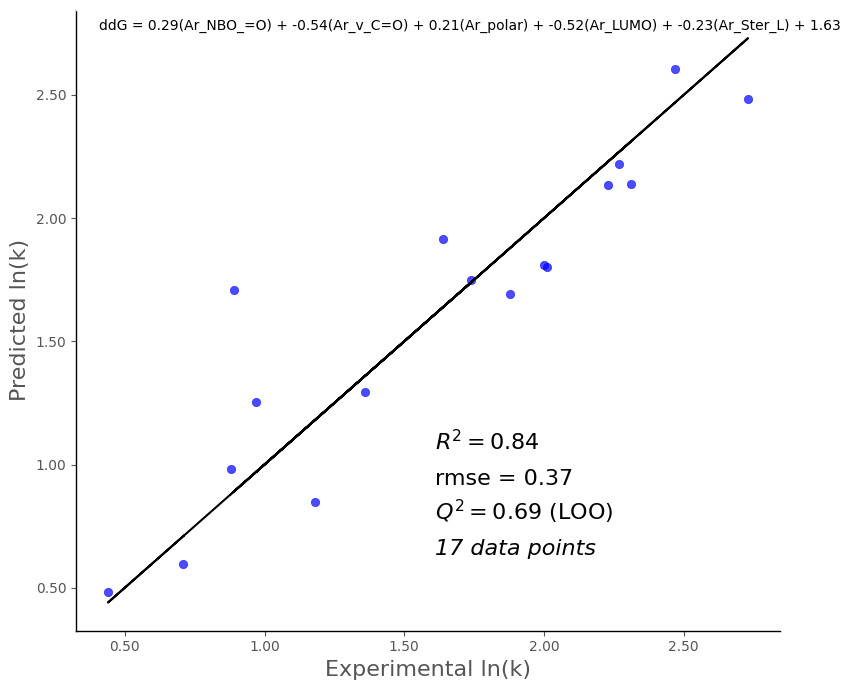

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# plot
best = sorted(results, key=lambda x: x['r2_full'], reverse=True)[0]
X_columns = best['features']
coefficients = np.array(best['coefficients'])
intercept = best['intercept']
y_actual = df[target]
y_pred = np.dot(df[X_columns].values, coefficients) + intercept

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_facecolor('w')
ax.plot(y_actual, y_actual, color='k')
ax.scatter(y_actual, y_pred, edgecolor='b', facecolor='b', alpha=0.7)
ax.set_xlabel("Experimental ln(k)", fontsize=16)
ax.set_ylabel("Predicted ln(k)", fontsize=16)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.text(0.13, 0.95, f'ddG = {" + ".join([f"{c:.2f}({f})" for c, f in zip(coefficients, X_columns)])} + {intercept:.2f}', fontsize=10)
fig.text(0.55, 0.35, f'$R^2= {best["r2_full"]:.2f}$', fontsize=16)
fig.text(0.55, 0.30, f'rmse = {best["rmse"]:.2f}', fontsize=16)
fig.text(0.55, 0.25, f'$Q^2= {best["q2_loocv"]:.2f}$ (LOO)', fontsize=16)
fig.text(0.55, 0.20, f'{len(y_actual)} data points', fontsize=16, style='italic')

fig.tight_layout()
plt.savefig("Regression_Plot.png", bbox_inches='tight')
plt.show()